# Bibliotecas

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree 
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Font, Alignment
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Import dos dados

In [8]:
df = pd.read_csv("tb_2013_2015_2017_2019_municipio.csv")

dfAnosFinais = df.copy()

dfAnosFinaisTeste = df.copy()

In [9]:
# Pré-Processamento dos dados de treino e teste dos anos iniciais

# Removendo colunas que não serão utilizadas
colunas_a_serem_dropadas = [
        "nomePais", "codRegiao", "nomeRegiao", "codEstado", "codMunicipio","valor", "AFDMedioG1", "AFDMedioG2","AFDMedioG3",
         "AFDMedioG4", "AFDMedioG5","ATUMedioTotal", "ATUMedio1Serie",
         "ATUMedio2Serie", "ATUMedio3Serie", "ATUMedioNaoSeriado", "ATUMedio4Serie", "IEDEnsinoMedioNivel5", 
         "DSUMedio", "HADMedioTotal", "HADMedio1Serie", "HADMedio2Serie",
         "HADMedio3Serie", "HADMedio4Serie", "HADMedioNaoSeriado",
         "ICGNivelMedio", "IEDEnsinoMedioNivel1","IEDEnsinoMedioNivel2",
         "IEDEnsinoMedioNivel3", "IEDEnsinoMedioNivel4", "IEDEnsinoMedioNivel6",
         "TDIMedio1Serie","TDIMedio2Serie", "TDIMedio3Serie", "TDIMedio4Serie", "nomeMunicipio", "nomeEstado", "AFDInfantilG2",
        "AFDInfantilG3", "AFDInfantilG4", "AFDInfantilG5", "AFDFundamentalTotalG1", "AFDFundamentalTotalG2", "AFDFundamentalTotalG3", "AFDFundamentalTotalG4",
        "AFDFundamentalTotalG5", "InvestAlunoInfantil", "InvestAlunoMedio", "AFDInfantilG1", "ATUInfantilTotal", "ATUInfantilCreche", "ATUInfantilPreEscola",
        "ATUFundamentalTotal", "ATUFundamental1Ano", "ATUFundamental2Ano",
        "ATUFundamental3Ano", "ATUFundamental4Ano", "ATUFundamental5Ano",
        "ATUFundamentalMultietapa", "DSUInfantilTotal", "DSUInfantilCreche",
        "DSUInfantilPreEscola", "DSUFundamentalTotal", "HADInfantilTotal", 
        "HADInfantilCreche", "HADInfantilPreEscola", "HADFundamentalTotal",
        "HADFundamental1Ano", "HADFundamental2Ano", "HADFundamental3Ano", 
        "HADFundamental4Ano", "HADFundamental5Ano", "IEDFundamentalTotalNivel1", "IEDFundamentalTotalNivel2", 
        "IEDFundamentalTotalNivel3", "IEDFundamentalTotalNivel4",
        "IEDFundamentalTotalNivel5", "IEDFundamentalTotalNivel6",
        "IRDMediaTotal", "TDIFundamental1Ano", "TDIFundamental2Ano",
        "TDIFundamental3Ano", "TDIFundamental4Ano", "TDIFundamental5Ano",
        "TDIFundamentalTotal","HADFundamental6Ano","HADFundamental7Ano","HADFundamental8Ano","HADFundamental9Ano","ATUFundamental6Ano","ATUFundamental7Ano",
        "ATUFundamental8Ano","ATUFundamental9Ano","TDIFundamental6Ano", "TDIFundamental7Ano","TDIFundamental8Ano","TDIFundamental9Ano","DSUFundamentalInicial",
        "anosIniciais", "AFDFundamentalAnosIniciaisG1", "AFDFundamentalAnosIniciaisG2",
        "AFDFundamentalAnosIniciaisG3", "AFDFundamentalAnosIniciaisG4", "AFDFundamentalAnosIniciaisG5",
        "ATUFundamentalAnosIniciais",  "HADFundamentalAnosIniciais","IEDFundamentalAnosIniciaisNivel1", "IEDFundamentalAnosIniciaisNivel2",
        "IEDFundamentalAnosIniciaisNivel3", "IEDFundamentalAnosIniciaisNivel4", "IEDFundamentalAnosIniciaisNivel5", 
        "IEDFundamentalAnosIniciaisNivel6","TDIFundamentalAnosIniciais","TDIMedioTotal"
]

# Pré-processamento dos dados para dfAnosIniciais
dfAnosFinais.drop(colunas_a_serem_dropadas, axis=1, inplace=True)

# Pré-processamento dos dados para dfAnosFinaisTeste
dfAnosFinaisTeste.drop(colunas_a_serem_dropadas, axis=1, inplace=True)

dfAnosFinais.fillna("NaN")
dfAnosFinais[:] = np.nan_to_num(dfAnosFinais)
dfAnosFinaisTeste.fillna("NaN")
dfAnosFinaisTeste[:] = np.nan_to_num(dfAnosFinaisTeste)

# Análises

Modelo [2013] prevendo 2013:
Resultados: 
MSE: 0.8929058144496086
RMSE: 0.9449369367580085
MAE: 0.6069727059204968

Modelo [2015] prevendo 2015:
Resultados: 
MSE: 1.244252448378249
RMSE: 1.115460644029295
MAE: 0.6928384524977103

Modelo [2017] prevendo 2017:
Resultados: 
MSE: 0.6643496326979966
RMSE: 0.8150764581914979
MAE: 0.541650635416235

Modelo [2019] prevendo 2019:
Resultados: 
MSE: 1.483648999580157
RMSE: 1.2180513123756966
MAE: 0.7111029853672678

Feature: InvestAlunoFundamental, Score: 0.068844
Feature: InvestDocentes, Score: 0.030650
Feature: InvestNaoDocentes, Score: 0.063145
Feature: anosFinais, Score: 0.020834
Feature: AFDFundamentalAnosFinaisG1, Score: 0.000000
Feature: AFDFundamentalAnosFinaisG2, Score: 0.000000
Feature: AFDFundamentalAnosFinaisG3, Score: 0.030329
Feature: AFDFundamentalAnosFinaisG4, Score: 0.000000
Feature: AFDFundamentalAnosFinaisG5, Score: 0.026362
Feature: ATUFundamentalAnosFinais, Score: 0.015371
Feature: DSUFundamentalFinal, Score: 0.028515
Feature

C:\Users\abili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


[Text(0.5023148148148148, 0.9166666666666666, 'node #0\nIRDAlta <= 0.405\nsquared_error = 1.51\nsamples = 100.0%\nvalue = 4.382'),
 Text(0.24537037037037038, 0.75, 'node #1\nInvestNaoDocentes <= 1.054\nsquared_error = 1.388\nsamples = 65.7%\nvalue = 4.677'),
 Text(0.12037037037037036, 0.5833333333333334, 'node #2\nIRDAlta <= 0.049\nsquared_error = 1.216\nsamples = 55.4%\nvalue = 4.745'),
 Text(0.07407407407407407, 0.4166666666666667, 'node #3\nInvestAlunoFundamental <= 2.185\nsquared_error = 1.241\nsamples = 43.2%\nvalue = 4.834'),
 Text(0.037037037037037035, 0.25, 'node #4\nDSUFundamentalFinal <= 0.889\nsquared_error = 1.131\nsamples = 42.4%\nvalue = 4.856'),
 Text(0.018518518518518517, 0.08333333333333333, 'node #5\nsquared_error = 1.205\nsamples = 36.6%\nvalue = 4.801'),
 Text(0.05555555555555555, 0.08333333333333333, 'node #6\nsquared_error = 0.513\nsamples = 5.7%\nvalue = 5.207'),
 Text(0.1111111111111111, 0.25, 'node #7\nInvestAlunoFundamental <= 2.227\nsquared_error = 5.702\nsam

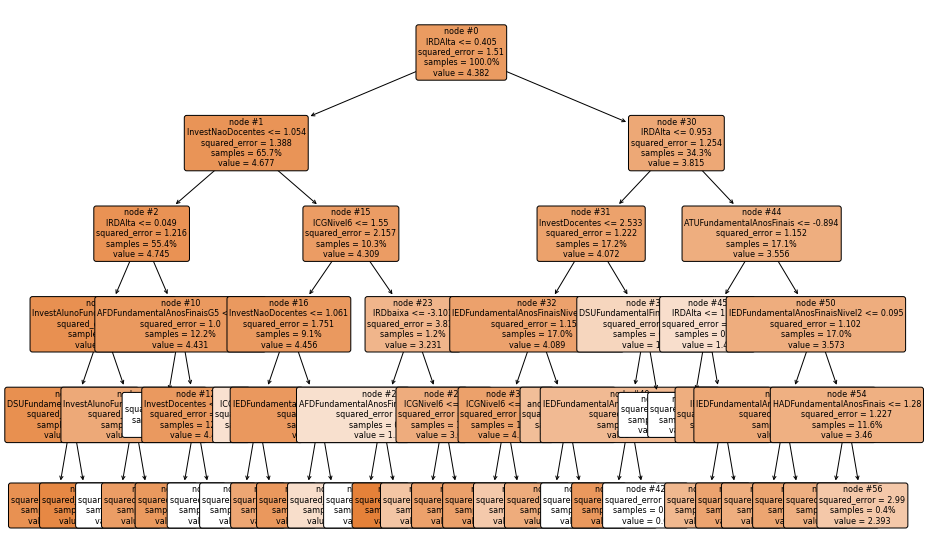

In [11]:
# Análises

# análise 1: 2013 para prever 2015
# análise 2: 2015 para prever 2017
# análise 3: 2017 para prever 2019
# análise 4: 2013 + 2015 para prever 2017
# análise 5: 2015 + 2017 para prever 2019
# análise 6: 2013 + 2015 + 2017 para prever 2019

# Lista de combinações de anos
combinacoes_anos = [
    [2013, 2013],
    [2015, 2015],
    [2017, 2017],
    [2019, 2019]
]

# Dicionário para armazenar os modelos de Árvore:
modelos = {}

# Loop pelas Combinações de anos:
for combo in combinacoes_anos:
    anos_treino = list(combo[:-1])
    ano_teste = combo[-1]

    # Filtrar os dados de treinamento e teste
    df_treino = dfAnosFinais[dfAnosFinais["Ano"].isin(anos_treino)]
    df_teste = dfAnosFinaisTeste[dfAnosFinaisTeste["Ano"] == ano_teste]

    # Separar as variáveis independentes e a variável alvo
    X_treino = df_treino.drop(["Ano", "anosFinais"], axis=1)
    y_treino = df_treino["anosFinais"]

    X_teste = df_teste.drop(["Ano", "anosFinais"], axis=1)
    y_teste = df_teste["anosFinais"]

    # Train_test_split
    X_treino, X_teste, y_treino, y_teste = train_test_split(X_treino, y_treino, test_size=0.3, random_state=1)

    # armazenando os nomes das colunas:
    column = df_treino.columns.tolist()

    # Quantile Transformer
    from sklearn.preprocessing import QuantileTransformer
    qt = QuantileTransformer(output_distribution="normal")
    X_treino = qt.fit_transform(X_treino)
    X_teste = qt.transform(X_teste)

    # Criar o modelo de Árvore de Decisão
    modelo = DecisionTreeRegressor(max_depth=5, random_state=1)

    # Treinar o modelo
    modelo.fit(X_treino, y_treino)

    # Realizar previsoes nos dados de teste
    y_pred = modelo.predict(X_teste)
    
    # Nome da análise
    nome_analise = f"Modelo {combo[:-1]} prevendo {ano_teste}:"

    # Armazenr o modelo e resultados
    modelos[nome_analise] = {
        "modelo": modelo,
        "resultados": {
            "MSE": metrics.mean_squared_error(y_teste, y_pred),
            "RMSE": np.sqrt(metrics.mean_squared_error(y_teste, y_pred)),
            "MAE": metrics.mean_absolute_error(y_teste, y_pred)
        }
    }    

# Mostrar os resultados
for nome_analise, resultados in modelos.items():
    print(nome_analise)
    print("Resultados: ")
    for metrica, valor in resultados["resultados"].items():
        print(f"{metrica}: {valor}")
    print()

# Feature Importance:
importance = modelo.feature_importances_

for i, v in enumerate(importance):
    print(f"Feature: {column[i]}, Score: {v:3f}")

# Converter o dicionario de resultados em um dataframe
df_resultados = pd.DataFrame({k: v["resultados"] for k, v in modelos.items()}).T

# criar um novo arquivo excel:
wb = Workbook()

# Planilha para os Resultados
wb_resultados = wb.active
wb_resultados.title = "Resultados Arvore de Decisao Anos Finais Intra Ano"

# Formataçao
font_title = Font(bold=True)
alignment_center = Alignment(horizontal="center")

# Adicionar o Título para a planilha de resultados
wb_resultados.append(["Análise"])
wb_resultados["A1"].font = font_title
wb_resultados["A1"].alignment = alignment_center

# Adicionar as colunas do DF de resultados
for row in dataframe_to_rows(df_resultados, index=True, header=True):
    wb_resultados.append(row)

# Nova planilha para o feature importance
wb_feature_importance = wb.create_sheet("Feature Importance")

# Formataçao para planila de feature importance
font_title = Font(bold=True)
alignment_center = Alignment(horizontal="center")

# Adicionar um título à planilha de Feature Importance
wb_feature_importance["A1"] = "Feature"
wb_feature_importance["A1"].font = font_title
wb_feature_importance["A1"].alignment = alignment_center
wb_feature_importance["B1"] = "Importance"
wb_feature_importance["B1"].font = font_title
wb_feature_importance["B1"].alignment = alignment_center

# Adicionar as informações do Feature Importance às colunas da planilha
for i, (feature, importance) in enumerate(zip(column, importance)):
    row_index = i + 2  # Começando da linha 2 (após o título)
    wb_feature_importance[f"A{row_index}"] = feature
    wb_feature_importance[f"B{row_index}"] = importance


# Salvar o arquivo
wb.save("ResultadosArvore_AnosFinais_Intra.xlsx")

# plotando a árvore:
plt.figure(figsize=(15, 10))
tree.plot_tree(modelo, max_depth=None, filled=True, label='all', precision=3, rounded=True, impurity=True, node_ids=True, proportion=True, feature_names=column, fontsize=8)

# Feature Importance:

Feature: InvestAlunoFundamental, Score: 0.069
Feature: InvestDocentes, Score: 0.031
Feature: InvestNaoDocentes, Score: 0.063
Feature: anosFinais, Score: 0.021
Feature: AFDFundamentalAnosFinaisG1, Score: 0.000
Feature: AFDFundamentalAnosFinaisG2, Score: 0.000
Feature: AFDFundamentalAnosFinaisG3, Score: 0.030
Feature: AFDFundamentalAnosFinaisG4, Score: 0.000
Feature: AFDFundamentalAnosFinaisG5, Score: 0.026
Feature: ATUFundamentalAnosFinais, Score: 0.015
Feature: DSUFundamentalFinal, Score: 0.029
Feature: HADFundamentalAnosFinais, Score: 0.012
Feature: ICGNivel1, Score: 0.000
Feature: ICGNivel2, Score: 0.000
Feature: ICGNivel3, Score: 0.000
Feature: ICGNivel4, Score: 0.000
Feature: ICGNivel5, Score: 0.000
Feature: ICGNivel6, Score: 0.079
Feature: IEDFundamentalAnosFinaisNivel1, Score: 0.015
Feature: IEDFundamentalAnosFinaisNivel2, Score: 0.012
Feature: IEDFundamentalAnosFinaisNivel3, Score: 0.005
Feature: IEDFundamentalAnosFinaisNivel4, Score: 0.000
Feature: IEDFundamentalAnosFinaisNivel

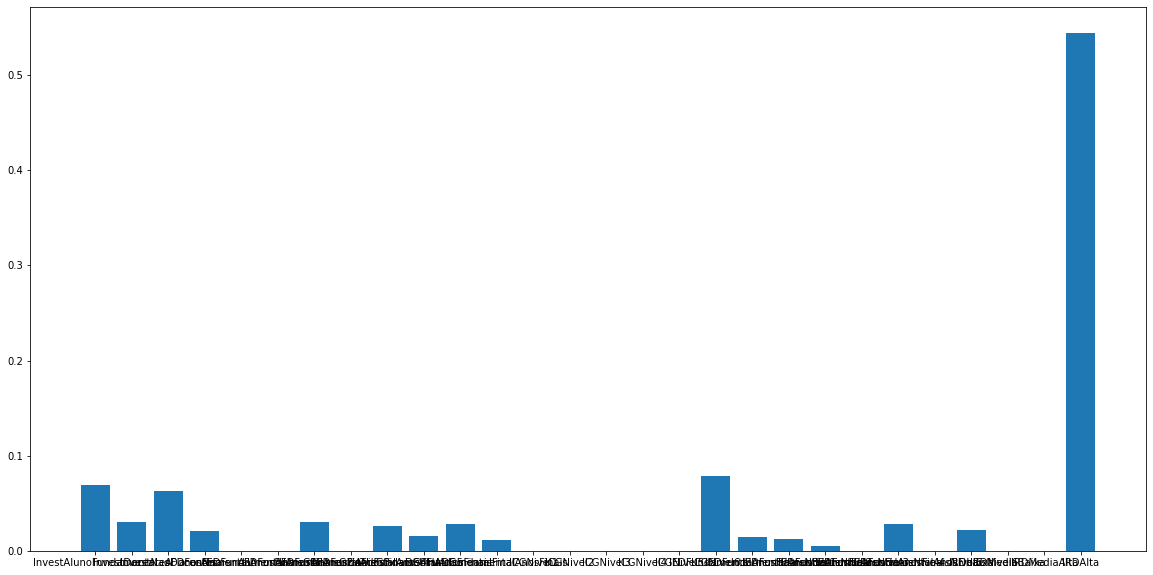

In [12]:
# Feature Importance:
importance = modelo.feature_importances_

for i, v in enumerate(importance):
    print(f"Feature: {column[i]}, Score: {v:.3f}")
    

print("Número de posições no gráfico de barras:", len(importance))
print("Tamanho da lista de colunas:", len(column))

# Corte as listas para que tenham o mesmo tamanho (28 elementos)
importance = importance[:len(column)]
column = column[:len(importance)]

# Plot do feature importance com os nomes das features:
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(importance)), column)
plt.show()


